In [1]:
env = "HalfCheetah-v2"
alg = "gail"
opponent = "PPO"
seeds = "_0_1_2_" if opponent == "VPG" else "_3_4_5_"
friction = True
best = False
include_PPO = True

In [2]:
import pickle
import sys
sys.path.insert(0, "../../PyTorch-RL/")
from utils import plot
import numpy as np

In [4]:
if best:
    with open("DataCompareAlphas" + env + seeds + "frictionTrue" + alg  + "best.p", "rb") as f:
        data = pickle.load(f)
else:
    with open("DataCompareAlphas" + env + seeds + "frictionTrue" + alg  + ".p", "rb") as f:
        data = pickle.load(f)

In [46]:
if include_PPO: # PPODataCompareAlphasHalfCheetah-v2frictionFalse
    for frict in ["0.25", "0.5", "0.75", "1.0", "2.0", "3.0", "4.0"]:
            with open("PPODataCompareAlphas" + env + "frictionTrue.p", "rb") as f:
                means, stds = pickle.load(f)
                
                

In [47]:
lines, std, labels = data[0], data[1], data[2]
new_labels = []

for l in labels:
    pieces = l.split("0")
    new_labels.append("0." + pieces[1])

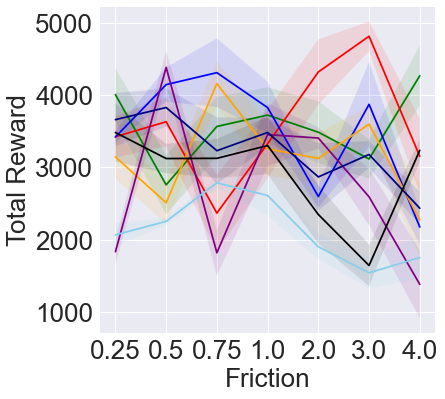

In [48]:
plot.plot_lines_and_ranges(list_to_plot=lines,
                          list_sigmas=std,
                          list_name= new_labels,
                          axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                          folder="../",
                          title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent,
                          x_axis=["0.25", "0.5", "0.75", "1.0", "2.0", "3.0", "4.0"],
                          legend = False)

In [3]:
## Evalaute on M^E ##

In [10]:
with open("DataCompareAlphas" + env + seeds + "frictionTrueexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)

In [11]:
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
first = lines.pop(0)
lines.append(first)
first = std.pop(0)
std.append(first)

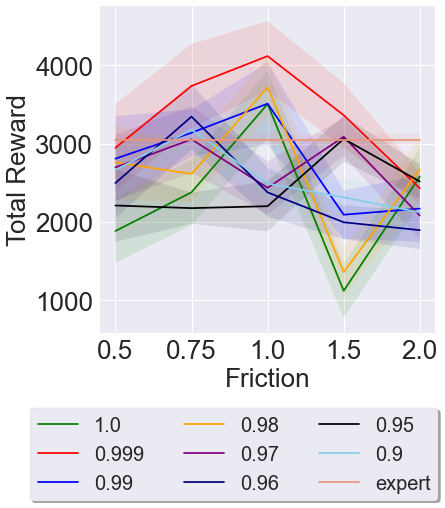

In [12]:
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrue",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)

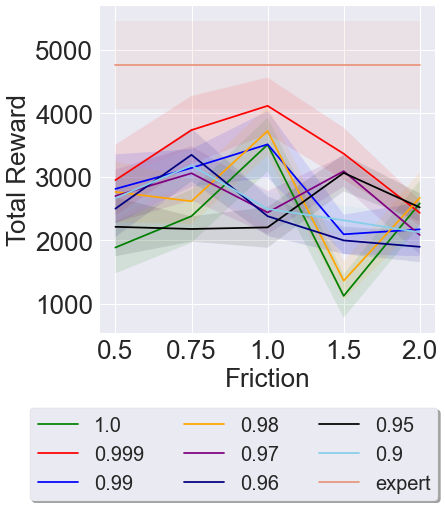

In [6]:
with open("DataCompareAlphas" + env + seeds + "frictionTrueexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
first = lines.pop(0)
lines.append([4763.0]*5)
first = std.pop(0)
std.append(np.array([689.0]*5))
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueTrainExp",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)

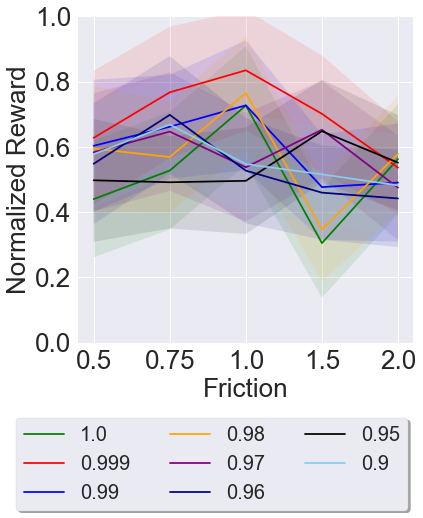

In [3]:
with open("DataCompareAlphas" + env + seeds + "frictionTrueexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9"]
lines.pop(0)
std.pop(0)
reward_max = 5053.
random_min = -602.
delta = reward_max -random_min
for j,item in enumerate(zip(lines, std)):
    lines[j] = item[0]/delta - random_min/delta 
    std[j] = item[1]/delta - random_min/delta 
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Normalized Reward"] if not friction else ["Friction", "Normalized Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueNormalized",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True,
                           ylim=[0,1])

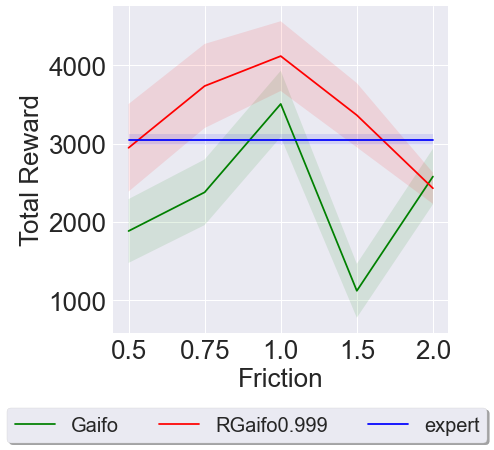

In [13]:
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[1]]+[lines[-1]],
                           list_sigmas=[std[0]] + [std[1]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[1]] + [new_labels[-1]],
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueBest",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)

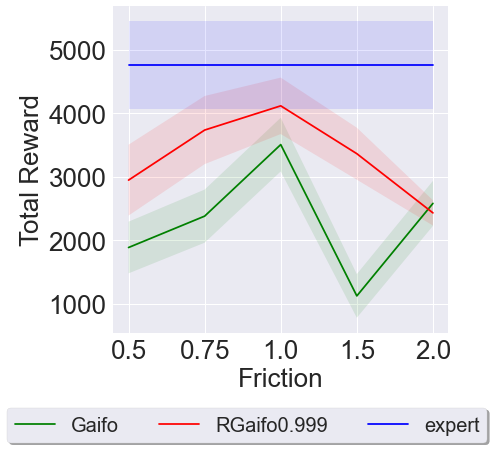

In [9]:
with open("DataCompareAlphas" + env + seeds + "frictionTrueexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
first = lines.pop(0)
lines.append([4763.0]*5)
first = std.pop(0)
std.append(np.array([689.0]*5))
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[1]]+[lines[-1]],
                           list_sigmas=[std[0]] + [std[1]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[1]] + [new_labels[-1]],
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueTrainExpBest",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)

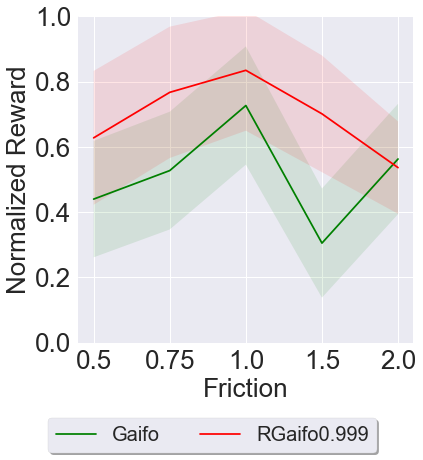

In [4]:
with open("DataCompareAlphas" + env + seeds + "frictionTrueexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9"]
lines.pop(0)
std.pop(0)
reward_max = 5053.
random_min = -602.
delta = reward_max -random_min
for j,item in enumerate(zip(lines, std)):
    lines[j] = item[0]/delta - random_min/delta 
    std[j] = item[1]/delta - random_min/delta 
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[1]],
                           list_sigmas=[std[0]] + [std[1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[1]],
                           axis_label=["Mass", "Normalized Reward"] if not friction else ["Friction", "Normalized Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueNormalizedBest",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True,
                           ylim=[0,1])